# Text Cleaning

### Helper Functions

I did a good bit of consolidation into categories here:

* **Mood Disorder** includes Depression and Seasonal Affective Disorder  
* **Pervasive Developmental Disorder** includes Autism and Aspergers  
* **Dissociative Disorder** includes Depersonalization Disorder 
* **Personality Disorder** includes Schizotypal Personality Disorder

In [1]:
import re
import pandas as pd

def cleanDisorders(disorder):
    disorder = re.sub("[\(\[].*?[\)\]]", "", str(disorder))
    disorder = disorder.rstrip()
    if disorder == 'Attention Deficit Hyperactivity Disorder':
        return 'ADHD'
    elif disorder == 'Post-traumatic Stress Disorder':
        return "PTSD"
    elif disorder == 'Obsessive-Compulsive Disorder':
        return "OCD"
    elif disorder == 'Anxiety Disorder':
        return "Anxiety"
    elif disorder == 'Autism' or disorder.lower() == 'autism spectrum disorder' or disorder == 'Asperges' or disorder == 'PDD-NOS':
        return 'Pervasive Developmental Disorder'
    elif disorder == 'Depression' or disorder == 'Seasonal Affective Disorder':
        return "Mood Disorder"
    elif disorder == 'Addictive Disorder' or disorder == 'Substance Use Disorder':
        return "Addiction or Substance Use"
    elif disorder.lower() == 'depersonalization disorder':
        return "Dissociative Disorder"
    elif disorder == 'Schizotypal Personality Disorder':
        return "Personality Disorder"
    else:
        return disorder
    
def loadData(filename):
    df = pd.read_csv(filename)
    print('\nShape:')
    print(df.shape)
    return df

def cleanAndGetCounts(df, qID, cleanFn):
    df[qID] = df[qID].apply(cleanFn)
    valCounts = df[qID].value_counts()
    valCounts = valCounts.iloc[1:]
    print(valCounts)
    return valCounts

### 2016 Diagnosed Mental Health Conditions

In [2]:
df2016 = loadData('data/QA_2016.T.csv')
valCounts = cleanAndGetCounts(df2016, '115', cleanDisorders)


Shape:
(4760, 61)
Mood Disorder                                                                                               775
Anxiety                                                                                                     648
ADHD                                                                                                        224
Addiction or Substance Use                                                                                  163
PTSD                                                                                                        141
Stress Response Syndromes                                                                                   104
Personality Disorder                                                                                         91
OCD                                                                                                          68
Eating Disorder                                                                      

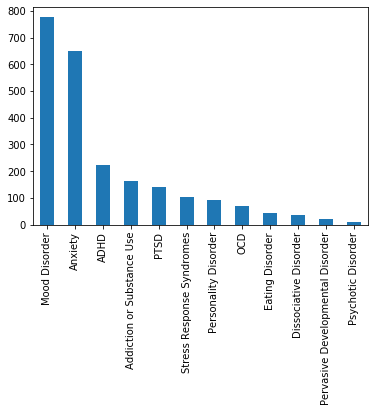

In [6]:
valCounts.sort_values(ascending=False).head(12).plot(kind='bar')

### 2016 Undiagnosed Mental Health Conditions

In [4]:
df16 = loadData('data/QA_2016.T.csv')
valCts = cleanAndGetCounts(df16, '116', cleanDisorders)


Shape:
(4760, 61)
Mood Disorder                       442
Anxiety                             389
ADHD                                132
Stress Response Syndromes           100
Personality Disorder                 90
Addiction or Substance Use           82
PTSD                                 56
OCD                                  52
Dissociative Disorder                24
Eating Disorder                      19
Psychotic Disorder                   18
Gender Identity Disorder              4
Burnout                               3
Asperger Syndrome                     3
Depersonalisation                     2
post-partum / anxiety                 2
Asperger's                            1
Suicidal Ideation                     1
We're all hurt, right?!               1
Pervasive Developmental Disorder      1
Tinnitus                              1
Name: 116, dtype: int64


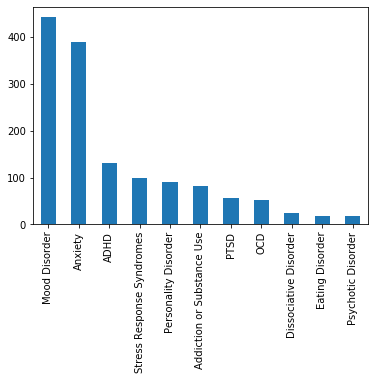

In [5]:
valCts.sort_values(ascending=False).head(11).plot(kind='bar')

# Feature Extraction

In [8]:
def removeNegOne(text):
    if text == -1:
        return 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

df2017 = loadData('data/QA_2017.T.csv')
df2018 = loadData('data/QA_2018.T.csv')
df2019 = loadData('data/QA_2019.T.csv')

with open("2017.txt", "w") as f:
    for each in df2017['71']:
        f.write(each + "\n")

with open("2018.txt", "w") as f:
    for each in df2018['71']:
        f.write(each + "\n")

with open("2019.txt", "w") as f:
    for each in df2019['71']:
        f.write(each + "\n")


Shape:
(756, 77)

Shape:
(417, 77)

Shape:
(352, 77)


(-0.5, 399.5, 199.5, -0.5)

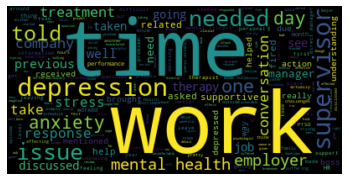

In [10]:
from wordcloud import WordCloud

txt = open("2017.txt").read()
wc = WordCloud().generate(txt)

import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

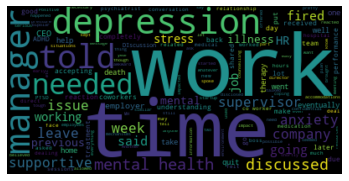

In [11]:
txt = open("2018.txt").read()
wc2 = WordCloud().generate(txt)

plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

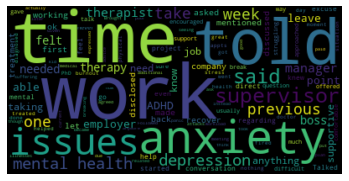

In [12]:
txt = open("2019.txt").read()
wc3 = WordCloud().generate(txt)

plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")

In [26]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=50)
dfCopy = df2017[['86', '59', '61', '63', '73', '75']]
lis = np.array(dfCopy.values.tolist()).flatten()

count = vect.fit_transform(lis)
print('\033[1m' + '\nQuestions 59, 61, 63, 73, 75, and 86.\n' + '\033[0m')
print('\n2017\n')
print(vect.get_feature_names())


Questions 59, 61, 63, 73, 75, and 86.


2017

['anxiety', 'better', 'care', 'conversation', 'conversations', 'coworker', 'coworkers', 'day', 'depression', 'discuss', 'discussed', 'don', 'employees', 'feel', 'having', 'health', 'health issues', 'help', 'illness', 'industry', 'issues', 'just', 'know', 'like', 'make', 'manager', 'mental', 'mental health', 'mentioned', 'need', 'needed', 'open', 'people', 'stigma', 'stress', 'support', 'supportive', 'talk', 'talked', 'talking', 'tech', 'therapy', 'things', 'think', 'time', 'told', 'understanding', 've', 'work', 'working']


In [27]:
dfCopy = df2018[['86', '59', '61', '63', '73', '75']]
lis = np.array(dfCopy.values.tolist()).flatten()

count = vect.fit_transform(lis)
print('\n2018\n')
print(vect.get_feature_names())


2018

['anxiety', 'better', 'care', 'company', 'conversation', 'conversations', 'coworker', 'coworkers', 'days', 'depression', 'discussed', 'don', 'employee', 'employees', 'going', 'having', 'health', 'health issues', 'help', 'industry', 'issues', 'job', 'just', 'know', 'like', 'lot', 'make', 'manager', 'mental', 'mental health', 'need', 'open', 'people', 'physical', 'shared', 'stigma', 'stress', 'support', 'supportive', 'talk', 'talked', 'talking', 'tech', 'therapy', 'think', 'time', 'told', 've', 'work', 'working']


In [28]:
dfCopy = df2019[['86', '59', '61', '63', '73', '75']]
lis = np.array(dfCopy.values.tolist()).flatten()

count = vect.fit_transform(lis)
print('\n2019\n')
print(vect.get_feature_names())


2019

['adhd', 'anxiety', 'anxiety depression', 'awareness', 'better', 'burnout', 'company', 'conversations', 'coworker', 'coworkers', 'day', 'depression', 'discussed', 'don', 'employees', 'feel', 'having', 'health', 'health issues', 'help', 'illness', 'industry', 'issue', 'issues', 'just', 'know', 'like', 'make', 'manager', 'mental', 'mental health', 'need', 'open', 'people', 'shared', 'stress', 'support', 'supportive', 'talk', 'talked', 'talking', 'team', 'therapy', 'things', 'think', 'time', 'told', 'understanding', 've', 'work']


In [27]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=50)
count = vect.fit_transform(df2017['59'])
print('\033[1m' + '\nQuestion: Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.\n' + '\033[0m')
print('\n2017\n')
print(vect.get_feature_names())


Question: Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.


2017

['able', 'anxiety', 'asked', 'boss', 'conversation', 'day', 'days', 'deal', 'depression', 'depression anxiety', 'diagnosis', 'discussed', 'disorder', 'employer', 'feel', 'felt', 'having', 'health', 'help', 'illness', 'issue', 'issues', 'just', 'leave', 'like', 'make', 'manager', 'medication', 'mental', 'mental health', 'mentioned', 'need', 'needed', 'offered', 'performance', 'related', 'said', 'stress', 'supervisor', 'supportive', 'taken', 'talk', 'talked', 'therapist', 'things', 'time', 'told', 'understanding', 've', 'work']


In [28]:
count = vect.fit_transform(df2018['59'])
print('\n2018\n')
print(vect.get_feature_names())


2018

['anxiety', 'ask', 'boss', 'care', 'company', 'conversation', 'day', 'days', 'depression', 'depression anxiety', 'did', 'direct', 'discussed', 'employer', 'going', 'having', 'health', 'help', 'home', 'issues', 'know', 'leave', 'let', 'lot', 'making', 'manager', 'mental', 'mental health', 'mentioned', 'need', 'needed', 'office', 'open', 'program', 'related', 'sick', 'stress', 'supervisor', 'support', 'supportive', 'taking', 'talk', 'therapy', 'time', 'told', 'treatment', 'understanding', 've', 'work', 'working']


In [29]:
count = vect.fit_transform(df2019['59'])
print('\n2019\n')
print(vect.get_feature_names())


2019

['adhd', 'anxiety', 'company', 'conversation', 'day', 'depression', 'didn', 'direct', 'discussed', 'disorder', 'doing', 'employer', 'going', 'having', 'health', 'help', 'issues', 'job', 'just', 'know', 'leave', 'let', 'let know', 'like', 'make', 'manager', 'mental', 'mental health', 'need', 'needed', 'offered', 'people', 'reaction', 'received', 'said', 'spoke', 'stress', 'supervisor', 'support', 'supportive', 'taken', 'talked', 'team', 'time', 'told', 'understanding', 've', 'wanted', 'work', 'years']


In [33]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=50)
count = vect.fit_transform(df2017['61'])
print('\033[1m' + '\nQuestion: Describe the conversation with coworkers you had about your mental health including their reactions.\n' + '\033[0m')
print('\n2017\n')
print(vect.get_feature_names())


Question: Describe the conversation with coworkers you had about your mental health including their reactions.


2017

['anxiety', 'conversation', 'conversations', 'coworker', 'coworkers', 'day', 'depression', 'discuss', 'discussed', 'don', 'experiences', 'feel', 'felt', 'generally', 'having', 'health', 'health issues', 'help', 'issues', 'just', 'know', 'like', 'lot', 'medication', 'mental', 'mental health', 'mentioned', 'open', 'people', 'positive', 'reaction', 'reactions', 'shared', 'similar', 'slack', 'stress', 'support', 'supportive', 'talk', 'talked', 'team', 'therapy', 'things', 'time', 'told', 'understanding', 've', 've talked', 'work', 'workers']


In [31]:
count = vect.fit_transform(df2018['61'])
print('\n2018\n')
print(vect.get_feature_names())


2018

['anxiety', 'anxiety depression', 'asked', 'burnout', 'conversation', 'conversations', 'coworker', 'coworkers', 'depression', 'discuss', 'discussed', 'discussion', 'experiences', 'felt', 'friends', 'generally', 'having', 'health', 'health issues', 'issues', 'job', 'just', 'know', 'medication', 'mental', 'mental health', 'mentioned', 'open', 'people', 'positive', 'pretty', 'previous', 'related', 'shared', 'shared experiences', 'similar', 'supportive', 'surprised', 'talk', 'talked', 'talking', 'team', 'time', 'told', 'understanding', 've', 've talked', 've told', 'way', 'work']


In [32]:
count = vect.fit_transform(df2019['61'])
print('\n2019\n')
print(vect.get_feature_names())


2019

['adhd', 'anxiety', 'anxiety depression', 'close', 'comfortable', 'coworker', 'coworkers', 'day', 'depression', 'depression anxiety', 'didn', 'discuss', 'discussed', 'discussion', 'disorder', 'don', 'experiences', 'feel', 'feeling', 'generally', 'going', 'having', 'health', 'issues', 'just', 'know', 'lunch', 'mental', 'mental health', 'mentioned', 'open', 'people', 'reactions', 'related', 'say', 'shared', 'sharing', 'stress', 'struggle', 'supportive', 'talk', 'talked', 'talking', 'therapy', 'told', 'understand', 'understanding', 've', 'work', 'workers']


In [34]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=50)
count = vect.fit_transform(df2017['63'])
print('\033[1m' + '\nQuestion: Describe the conversation your coworker had with you about their mental health (please do not use names).\n' + '\033[0m')
print('\n2017\n')
print(vect.get_feature_names())


Question: Describe the conversation your coworker had with you about their mental health (please do not use names).


2017

['able', 'advice', 'anxiety', 'burnout', 'challenges', 'conversation', 'conversations', 'coworker', 'coworkers', 'day', 'dealing', 'depression', 'depression anxiety', 'described', 'direct', 'discuss', 'discussed', 'discussion', 'experiences', 'feel', 'general', 'having', 'health', 'health issues', 'help', 'issues', 'just', 'know', 'like', 'mental', 'mental health', 'mentioned', 'open', 'people', 'problems', 'related', 'shared', 'stress', 'struggles', 'support', 'talk', 'talked', 'talking', 'therapy', 'things', 'time', 'told', 've', 'work', 'worker']


In [36]:
count = vect.fit_transform(df2018['63'])
print('\n2018\n')
print(vect.get_feature_names())


2018

['anxiety', 'anxiety depression', 'asked', 'colleague', 'conversation', 'coworker', 'coworkers', 'depression', 'depression anxiety', 'discussed', 'discussion', 'employee', 'experiences', 'felt', 'going', 'having', 'health', 'health issues', 'help', 'issue', 'issues', 'know', 'leave', 'manager', 'medication', 'mental', 'mental health', 'mentioned', 'needed', 'open', 'people', 'place', 'recently', 'share', 'shared', 'slack', 'stress', 'struggles', 'talk', 'talked', 'talking', 'therapy', 'time', 'told', 'took', 've', 'wasn', 'work', 'worker', 'working']


In [37]:
count = vect.fit_transform(df2019['63'])
print('\n2019\n')
print(vect.get_feature_names())


2019

['anxiety', 'anxiety depression', 'asked', 'colleague', 'conversations', 'coworker', 'coworkers', 'depression', 'discuss', 'discussed', 'feeling', 'going', 'having', 'health', 'health issues', 'help', 'illness', 'issues', 'just', 'leave', 'medication', 'mental', 'mental health', 'need', 'open', 'partner', 'people', 'person', 'pressure', 'professional', 'really', 'related', 'resources', 'seek', 'shared', 'story', 'stress', 'struggles', 'struggling', 'suicide', 'talked', 'talking', 'team', 'time', 'told', 'treatment', 'um', 've', 'work', 'workers']


In [38]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=50)
count = vect.fit_transform(df2017['73'])
print('\033[1m' + '\nQuestion: Describe the conversation you had with your previous coworkers about your mental health including their reactions.\n' + '\033[0m')
print('\n2017\n')
print(vect.get_feature_names())


Question: Describe the conversation you had with your previous coworkers about your mental health including their reactions.


2017

['anxiety', 'close', 'colleagues', 'conversation', 'conversations', 'counseling', 'coworker', 'coworkers', 'deal', 'depression', 'did', 'didn', 'discussed', 'don', 'experiences', 'friends', 'general', 'going', 'good', 'having', 'health', 'health issues', 'help', 'issues', 'job', 'just', 'know', 'mental', 'mental health', 'people', 'personal', 'previous', 'reaction', 'really', 'remember', 'shared', 'similar', 'spoke', 'stress', 'supportive', 'talk', 'talked', 'talking', 'therapist', 'time', 'told', 'understanding', 've', 'work', 'working']


In [39]:
count = vect.fit_transform(df2018['73'])
print('\n2018\n')
print(vect.get_feature_names())


2018

['affected', 'anxiety', 'close', 'consider', 'conversations', 'coworker', 'coworkers', 'current', 'days', 'depression', 'did', 'didn', 'discussed', 'don', 'feeling', 'felt', 'friend', 'friends', 'health', 'issues', 'just', 'mental', 'mental health', 'open', 'previous', 'problems', 'reactions', 'really', 'recall', 'said', 'shared', 'stories', 'stress', 'stress anxiety', 'suffering', 'supportive', 'talk', 'talked', 'team', 'therapist', 'therapy', 'things', 'time', 'told', 'tried', 'understanding', 've', 'work', 'workers', 'working']


In [40]:
count = vect.fit_transform(df2019['73'])
print('\n2019\n')
print(vect.get_feature_names())


2019

['anxiety', 'anxiety depression', 'bad', 'burnout', 'colleagues', 'company', 'conversations', 'coworker', 'coworkers', 'day', 'dealing', 'depression', 'did', 'discussed', 'disorders', 'feel', 'feeling', 'felt', 'general', 'having', 'health', 'help', 'issues', 'just', 'like', 'medication', 'mental', 'mental health', 'open', 'past', 'people', 'pretty', 'previous', 'reaction', 'regarding', 'shared', 'sharing', 'similar', 'stress', 'support', 'supportive', 'talk', 'talked', 'things', 'time', 'told', 'understanding', 've', 'way', 'work']


In [14]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=50)
count = vect.fit_transform(df2017['75'])
print('\033[1m' + '\nQuestion: Describe the conversation you had with your previous coworkers about their mental health (please do not use names).\n' + '\033[0m')
print('\n2017\n')
print(vect.get_feature_names())


Question: Describe the conversation you had with your previous coworkers about their mental health (please do not use names).


2017

['anxiety', 'batshit', 'batshit crazy', 'burnout', 'came', 'conversation', 'conversations', 'coworker', 'coworkers', 'crazy', 'day', 'depression', 'described', 'discussed', 'discussions', 'disorders', 'don', 'going', 'health', 'health issues', 'help', 'issues', 'job', 'just', 'know', 'life', 'like', 'mental', 'mental health', 'office', 'people', 'person', 'previous', 'related', 'remember', 'similar', 'situation', 'stress', 'supervisor', 'support', 'supportive', 'talk', 'talked', 'team', 'therapists', 'time', 'tried', 'usually', 'work', 'worker']


In [15]:
count = vect.fit_transform(df2018['75'])
print('\n2018\n')
print(vect.get_feature_names())


2018

['abuse', 'addiction', 'anxiety', 'asked', 'close', 'company', 'conversations', 'coworker', 'coworkers', 'depression', 'discussed', 'don', 'employee', 'experiences', 'friends', 'going', 'happened', 'having', 'health', 'health issues', 'help', 'issues', 'leave', 'like', 'long', 'management', 'manager', 'medication', 'mental', 'mental health', 'panic', 'people', 'personal', 'previous', 'really', 'related', 'stress', 'stressed', 'substance', 'suicide', 'supportive', 'talk', 'talked', 'therapy', 'told', 've', 'work', 'worked', 'worker', 'workers']


In [16]:
count = vect.fit_transform(df2019['75'])
print('\n2019\n')
print(vect.get_feature_names())


2019

['abuse', 'anxiety', 'anxiety depression', 'asked', 'burned', 'came', 'colleague', 'conspiracy', 'conversations', 'coworker', 'day', 'deal', 'depression', 'details', 'did', 'discussed', 'don', 'don remember', 'family', 'feeling', 'friends', 'going', 'health', 'health issue', 'health issues', 'help', 'hr', 'issue', 'issues', 'just', 'life', 'like', 'mental', 'mental health', 'mentioned', 'past', 'people', 'remember', 'said', 'sharing', 'situation', 'support', 'talked', 'therapy', 'things', 'time', 'told', 'way', 'work', 'workplace']
